   # **The Spark Foundation**

# *Name- SIVASUBRAMANIAN.V* 

# **Task 1 : Prediction Using Supervised Machine Learning**

Predict the percentage of an student based on the no. of study hours.
This is a simple linear regression task as it involves just 2 variables.


In [3]:
#Import Necessary Libraries
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

In [4]:
    # Reading the CSV Data File
df = pd.read_csv(r"C:\Users\Petchimuthu\Downloads\student_scores.csv")
print("Data imported successfully")

Data imported successfully


In [5]:
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [6]:
#Selecting First 10 rows in Data Frame

df.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


   # Data Visualization 


To understand the relation between the two variables between No of hours studied vs Score Percentage 
 
The data is visualized by plotting them in a 2-D graph.


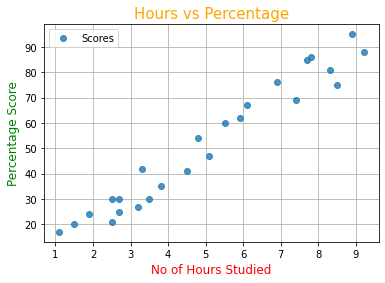

In [21]:
# Plotting the data in 2D GRAPH
df.plot(x='Hours', y='Scores', style='o', alpha=0.8)  
plt.title('Hours vs Percentage', size=15 , Color='Orange')  
plt.xlabel('No of Hours Studied', size=12 , color='red')  
plt.ylabel('Percentage Score', size=12 , color='green')
plt.grid(True)  
plt.show()

# Graph Prediction

We can clearly observe that there is a positive linear relation between the number of hours studied and percentage of score.

# Pre-Processing the data *

To pre-process the data for training and testing.

STEP 1:The original data is divided in two parts namely- X as input (feature) and y as output (target).

STEP 2: Then split into Training and Test set.

In [23]:
# pre-process the data
X = df.iloc[:, :1].values
y = df.iloc[:, -1].values

In [24]:
# Spliting the data (Training -80% & Testing - 20%)  
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.2, random_state=0)

In [25]:
# Training the model
from sklearn.linear_model import LinearRegression
linreg=LinearRegression()
linreg.fit(X_train, y_train)
print('linear model coeff (w): {}'.format(linreg.coef_))
print('linear model intercept (b): {:.3f}'. format(linreg.intercept_))

print("Training the Data Model is completed.")

linear model coeff (w): [9.91065648]
linear model intercept (b): 2.018
Training the Data Model is completed.


# Data Visualization for Plotting the Regression Model

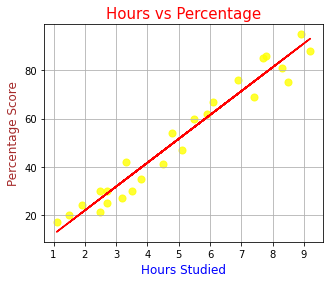

In [28]:
plt.figure(figsize=(5,4))
plt.scatter(X, y, marker='o', alpha=0.8, s=50,color='yellow')
plt.plot(X, linreg.coef_*X+ linreg.intercept_, 'r-')
plt.title('Hours vs Percentage', size=15 , color='red')  
plt.xlabel('Hours Studied', size=12, color='blue')  
plt.ylabel('Percentage Score', size=12, color='brown')
plt.grid(True)  
plt.show()


**The above graph shows that,the Linear Regression Model fits the data satisfactorily.**

#  Making Prediction **

In [59]:
print(X_test) # test data
y_pred=linreg.predict(X_test) # making Prediction

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [60]:
# Compare Actual vs Predict
df=pd.DataFrame({"Actual": y_test, "Predict": y_pred})
df

,Actual,Predict
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


# Evaluating the Model **

For evaluating the model's prediction THREE evaluating metrices are used:

Step 1 : Mean_absolute_error (absolute difference of target & predicted values)
Step 2 : Mean_squared_error (squared difference of target & predicted values)
Step 3 : R2 score (computes how well future instances will be predicted), 
         best possible score: 1.0 & constant possible score: 0.0

In [61]:
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

print('Mean Absolute Error: {:.2f}'.format(mean_absolute_error(y_test, y_pred)))
print('Mean Squared Error: {:.2f}'.format(mean_squared_error(y_test, y_pred)))
print('R-squared score (training): {:.3f}'.format(linreg.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'.format(linreg.score(X_test, y_test)))

Mean Absolute Error: 4.18
Mean Squared Error: 21.60
R-squared score (training): 0.952
R-squared score (test): 0.945


** From the above R-Squared Score Training & Test results gives nearly the Best Value 1.0 **
** The Model Fits well with the Data **

# Student studies for 9.25 hrs/ day?**

In [65]:
# Predicting  score
hours=[9.25]
own_data=linreg.predict([hours])
print("No. of Hours = {}".format(hours))
print("Predicted Score = {:.3f} %".format(own_data[0]))

No. of Hours = [9.25]
Predicted Score = 93.692 %


# Conclusion **

** If a student studies for 9.25 hrs/ day ,The predicted Score is : 93.692% **